In [37]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [38]:
%matplotlib inline

In [39]:
data=pd.read_csv('ads.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
data.shape

(200, 4)

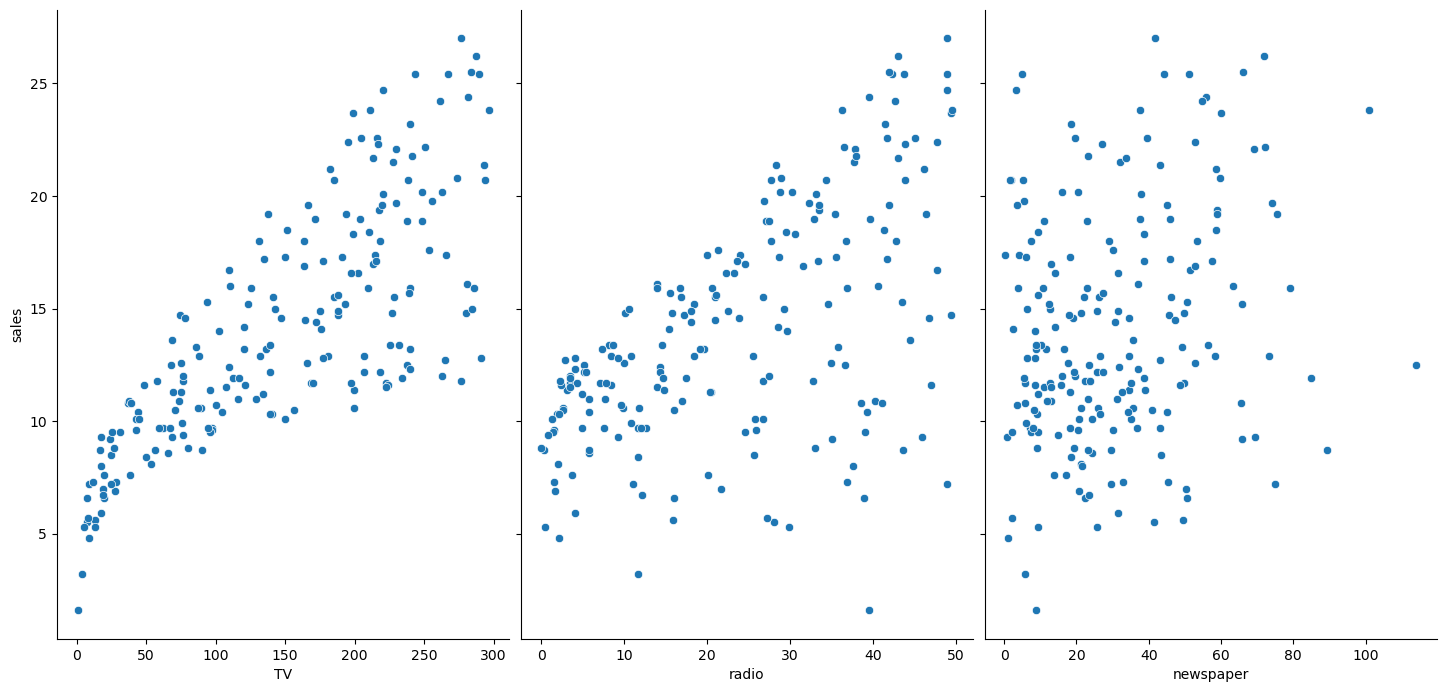

In [41]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

### TV  ###

In [42]:
feature_cols=['TV']
A=data[feature_cols]
b=data.sales
lm1=LinearRegression()
lm1.fit(A,b)
print(lm1.intercept_)
print(lm1.coef_)

7.032593549127694
[0.04753664]


In [43]:
lm1.predict([[50]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

### Radio  ###

In [44]:
feature_cols=['radio']
C=data[feature_cols]
d=data.sales
lm2=LinearRegression()
lm2.fit(C,d)
print(lm2.intercept_)
print(lm2.coef_)

9.311638095158283
[0.20249578]


In [45]:
lm2.predict([[50]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43642726])

### Newspaper

In [46]:
feature_cols=['newspaper']
E=data[feature_cols]
f=data.sales
lm3=LinearRegression()
lm3.fit(E,f)
print(lm3.intercept_)
print(lm3.coef_)

12.351407069278162
[0.0546931]


In [47]:
lm3.predict([[50]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.08606199])

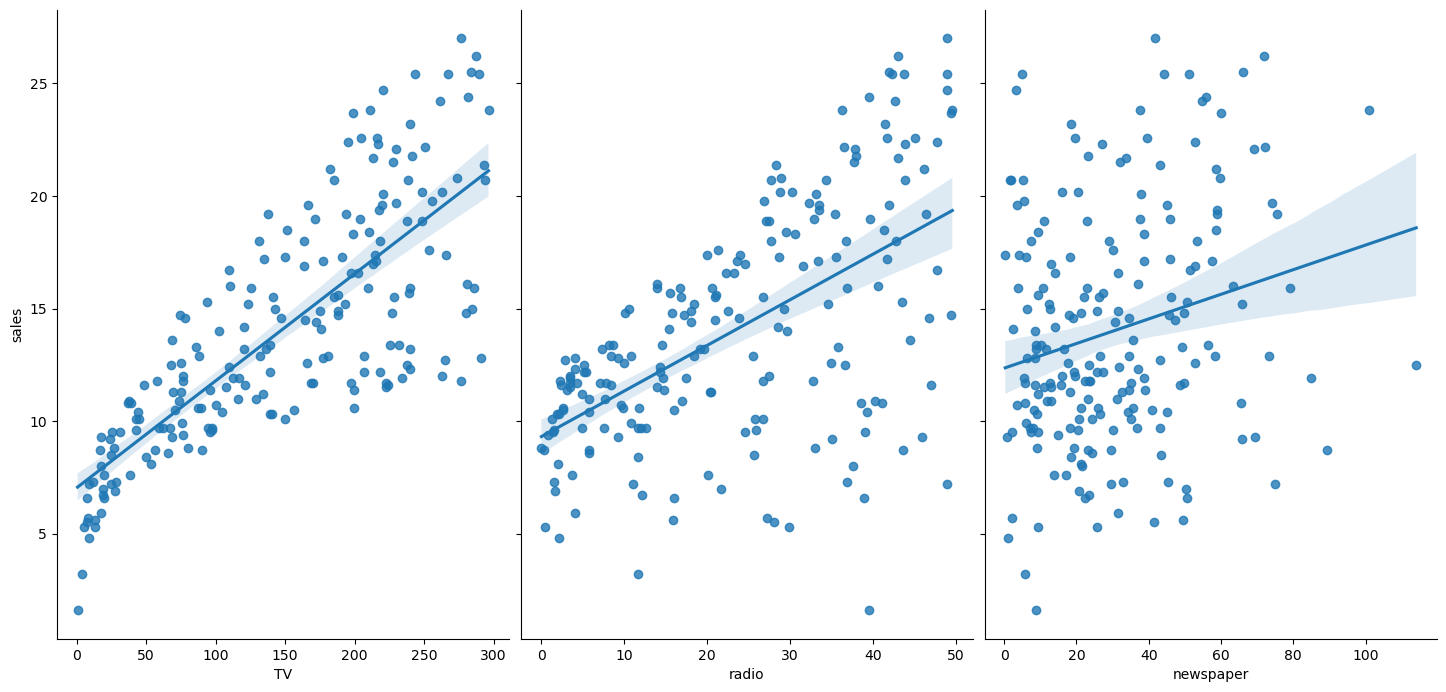

In [48]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7,kind='reg')

### All Three Combined  ###

In [49]:
feature_cols=['TV','radio','newspaper']
X=data[feature_cols]
y=data.sales

In [50]:
lm4=LinearRegression()
lm4.fit(X,y)

LinearRegression()

In [51]:
print(lm4.intercept_)
print(lm4.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [52]:
list(zip(feature_cols,lm4.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820453),
 ('newspaper', -0.00103749304247629)]

In [53]:
y_true=[100,50,30,20]
y_pred=[90,50,50,30]

In [54]:
print(metrics.mean_absolute_error(y_true,y_pred))
print(metrics.mean_squared_error(y_true,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true,y_pred)))

10.0
150.0
12.24744871391589


### Including Newspaper

In [55]:
M=data[['TV','radio','newspaper']]
n=data.sales

In [56]:
M_train,M_test,n_train,n_test=train_test_split(M,n,random_state=1)

In [57]:
lm5=LinearRegression()
lm5.fit(M_train,n_train)

LinearRegression()

In [58]:
n_pred=lm5.predict(M_test)

In [59]:
print(np.sqrt(metrics.mean_squared_error(n_test,n_pred)))

1.4046514230328953


In [60]:
lm5.score(M,n)

0.8963161233045729

### Excluding Newspaper ###

In [61]:
P=data[['TV','radio']]
q=data.sales

In [62]:
P_train,P_test,q_train,q_test=train_test_split(P,q,random_state=1)

In [63]:
lm6=LinearRegression()
lm6.fit(P_train,q_train)

LinearRegression()

In [64]:
q_pred=lm6.predict(P_test)

In [65]:
print(np.sqrt(metrics.mean_squared_error(q_test,q_pred)))

1.3879034699382886


In [66]:
lm6.score(P,q)

0.8966248862712952

In [67]:
lr_cv = LinearRegression()
cv_scores = cross_val_score(lr_cv, X, y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
cv_scores mean:0.8871063495438435
